<a href="https://colab.research.google.com/github/AnasTere/Data_Sci/blob/main/Copy_of_Hahn_Stats_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

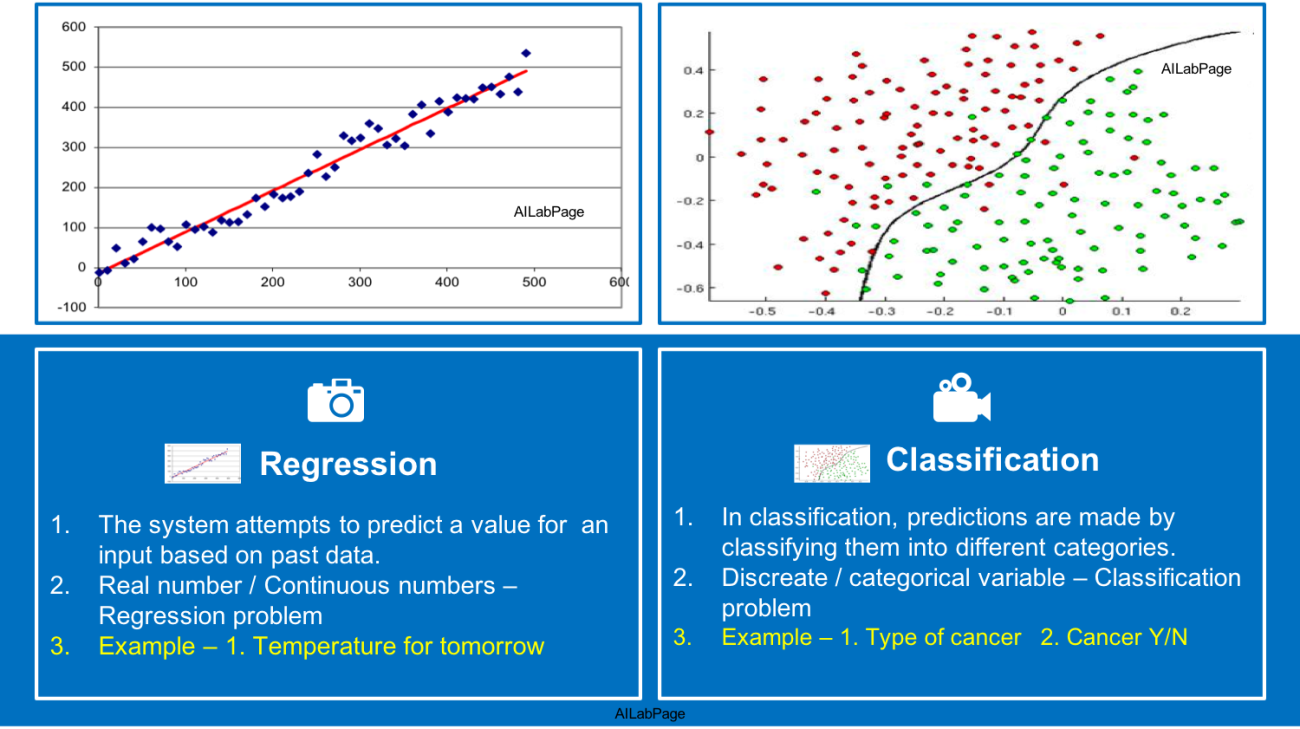

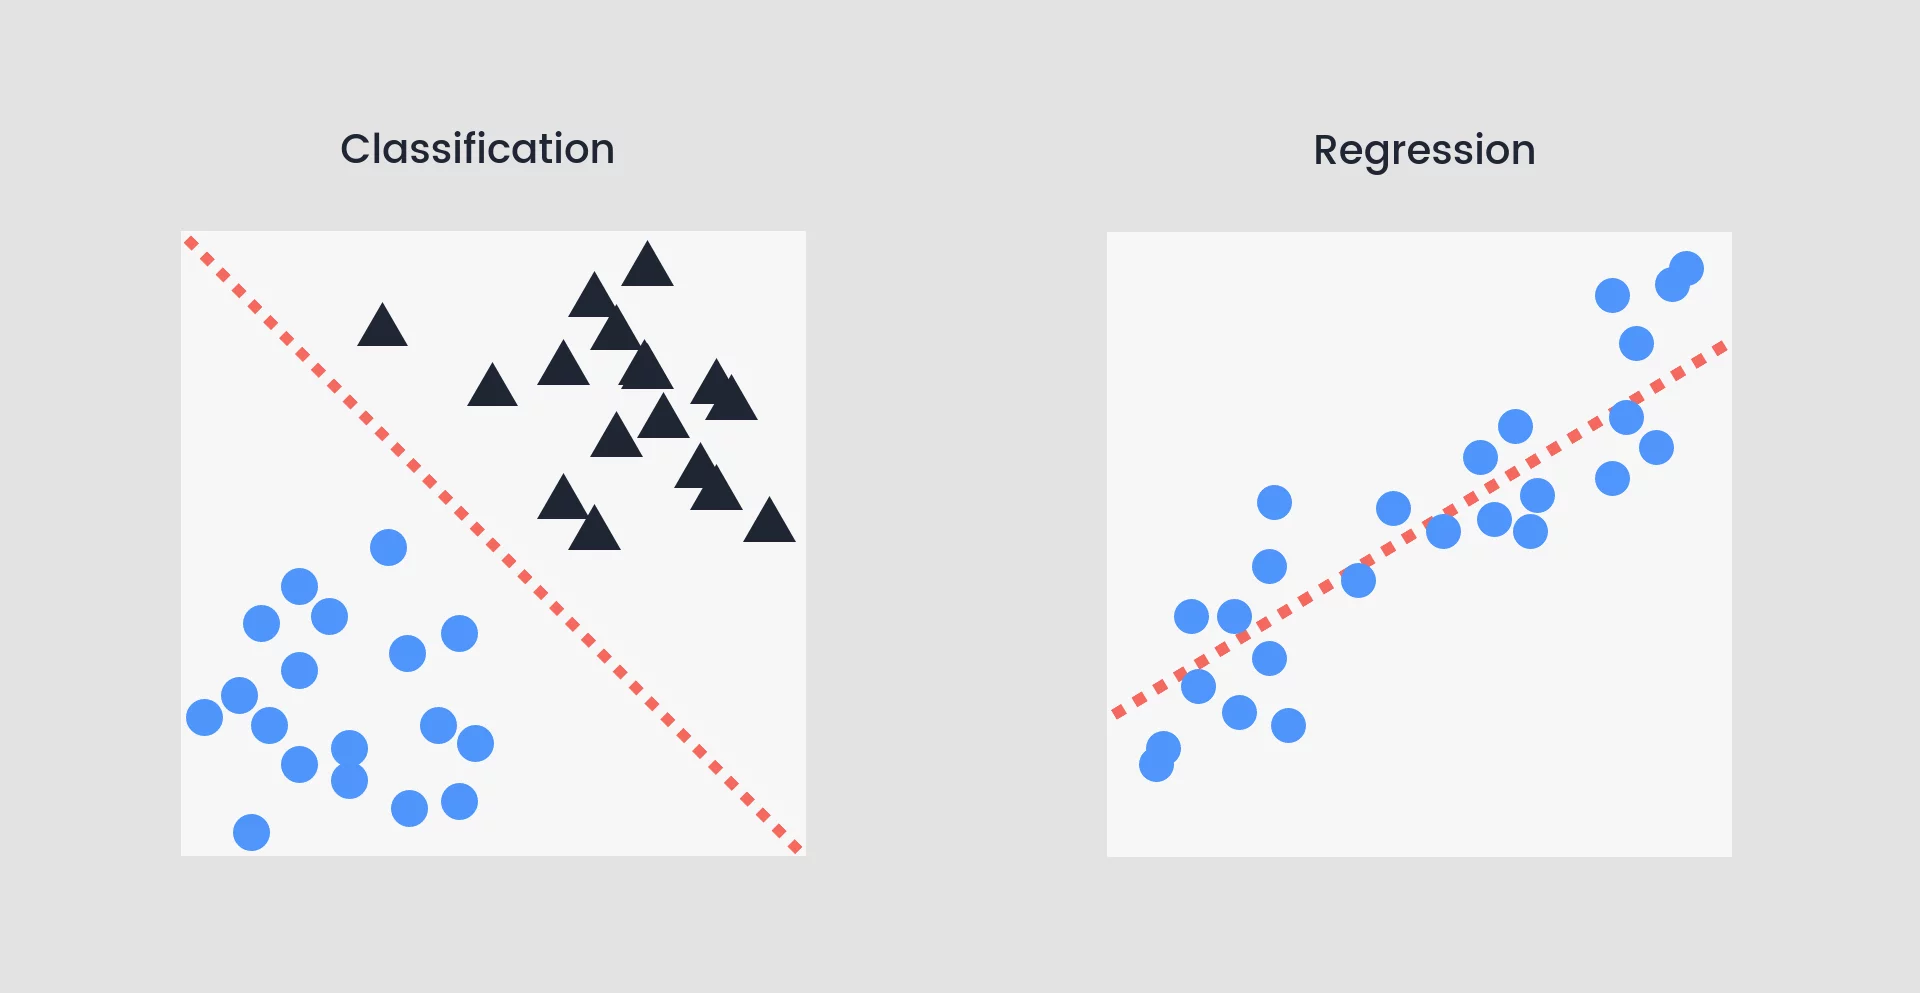

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

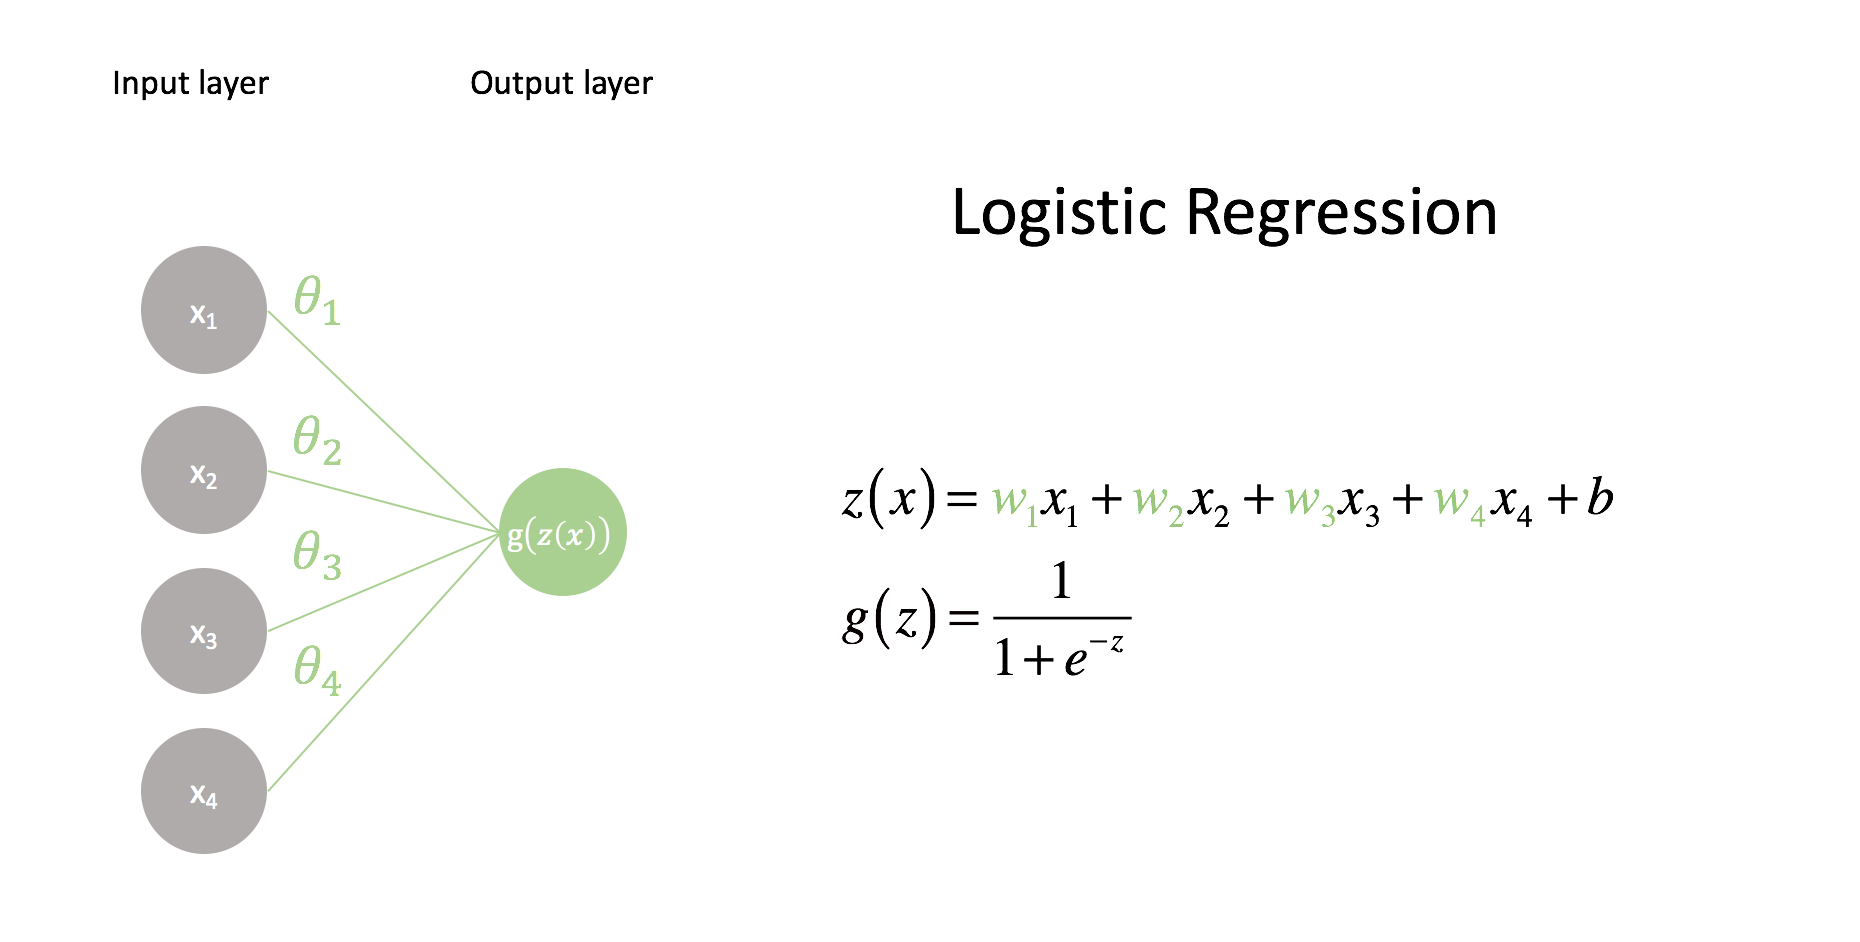

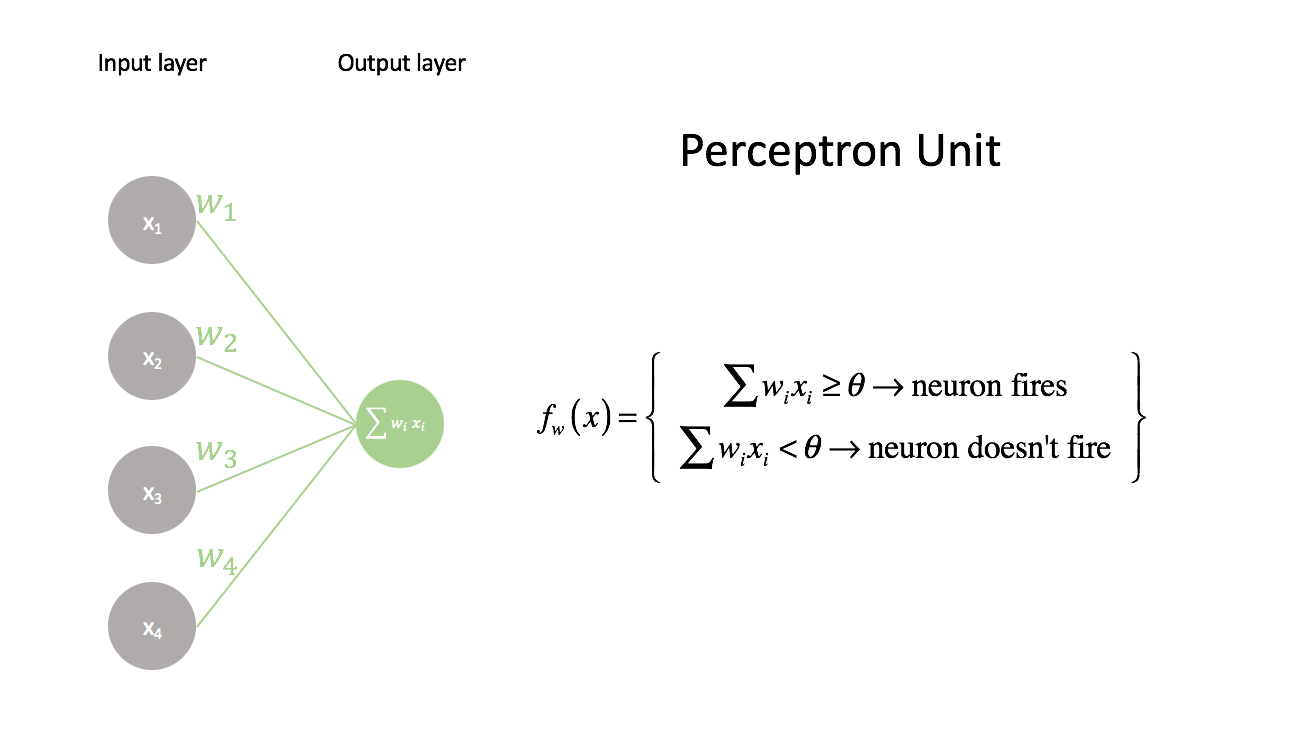

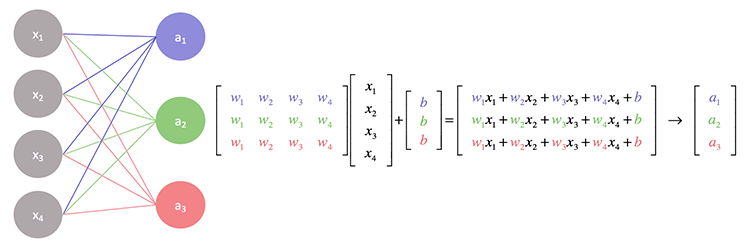

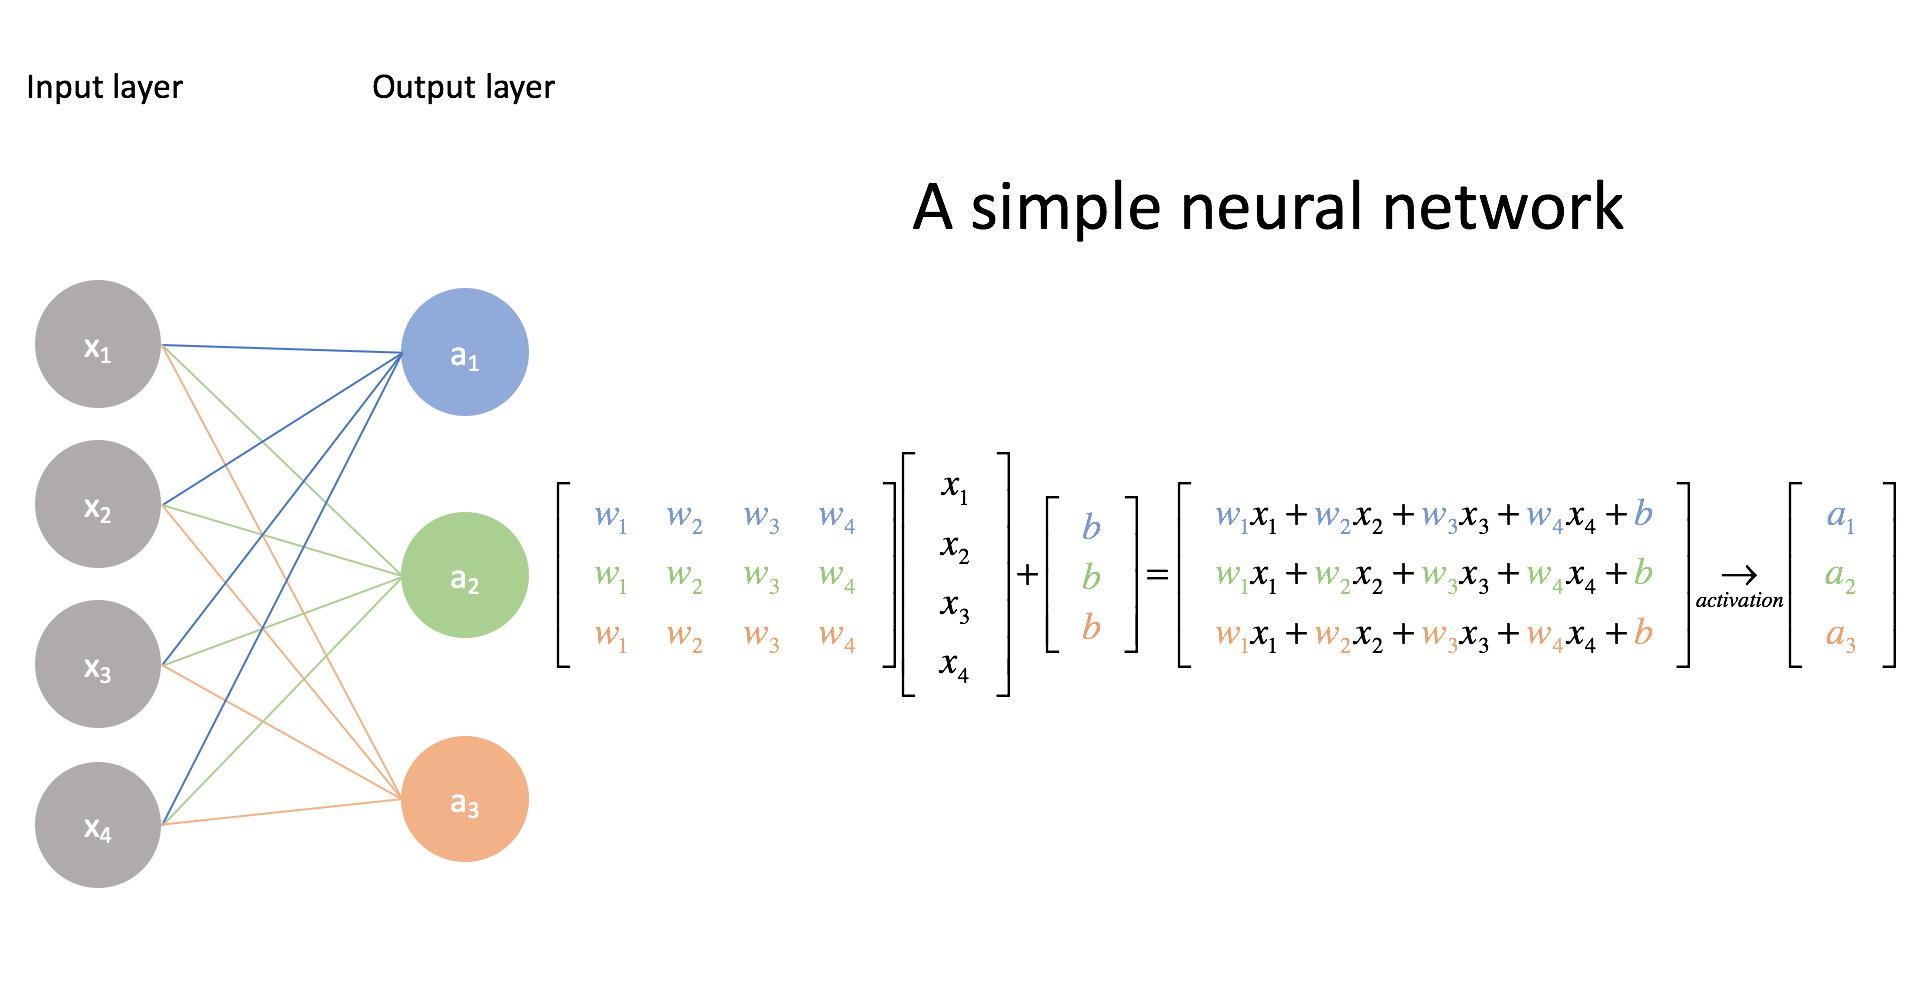

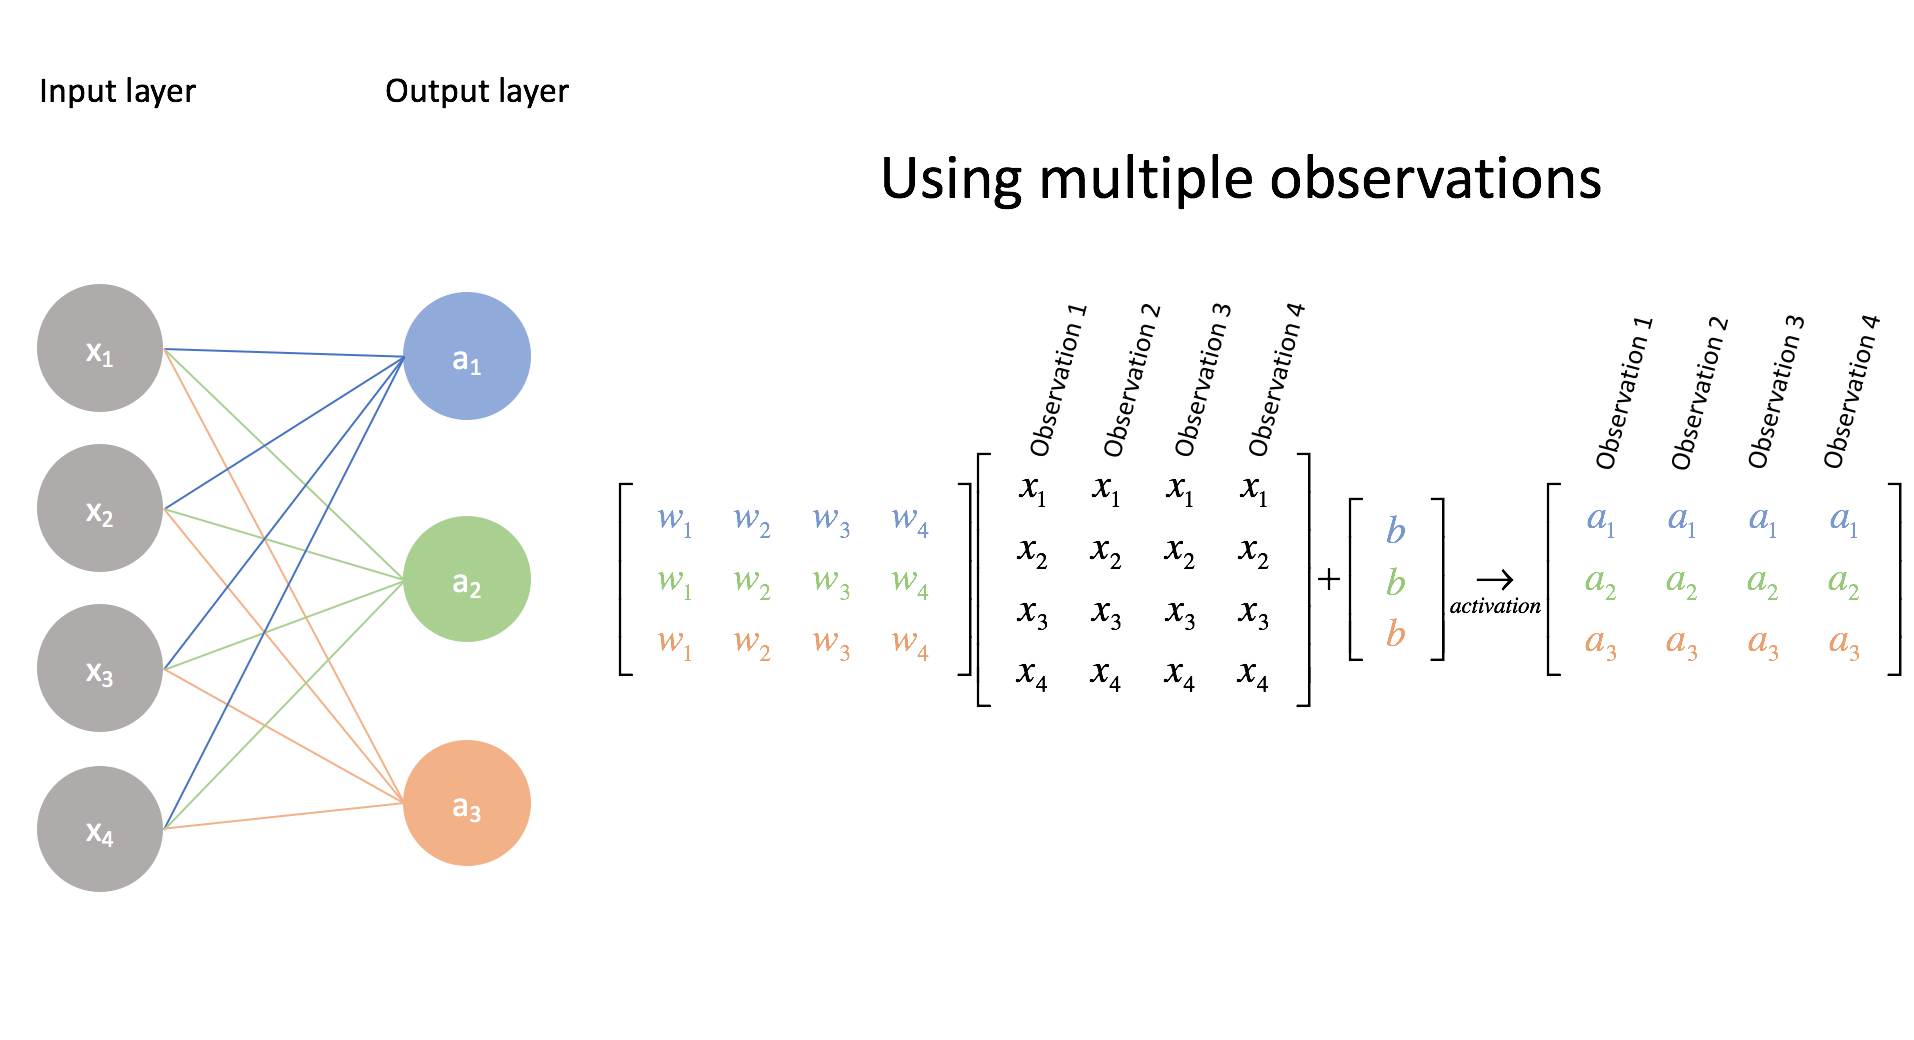

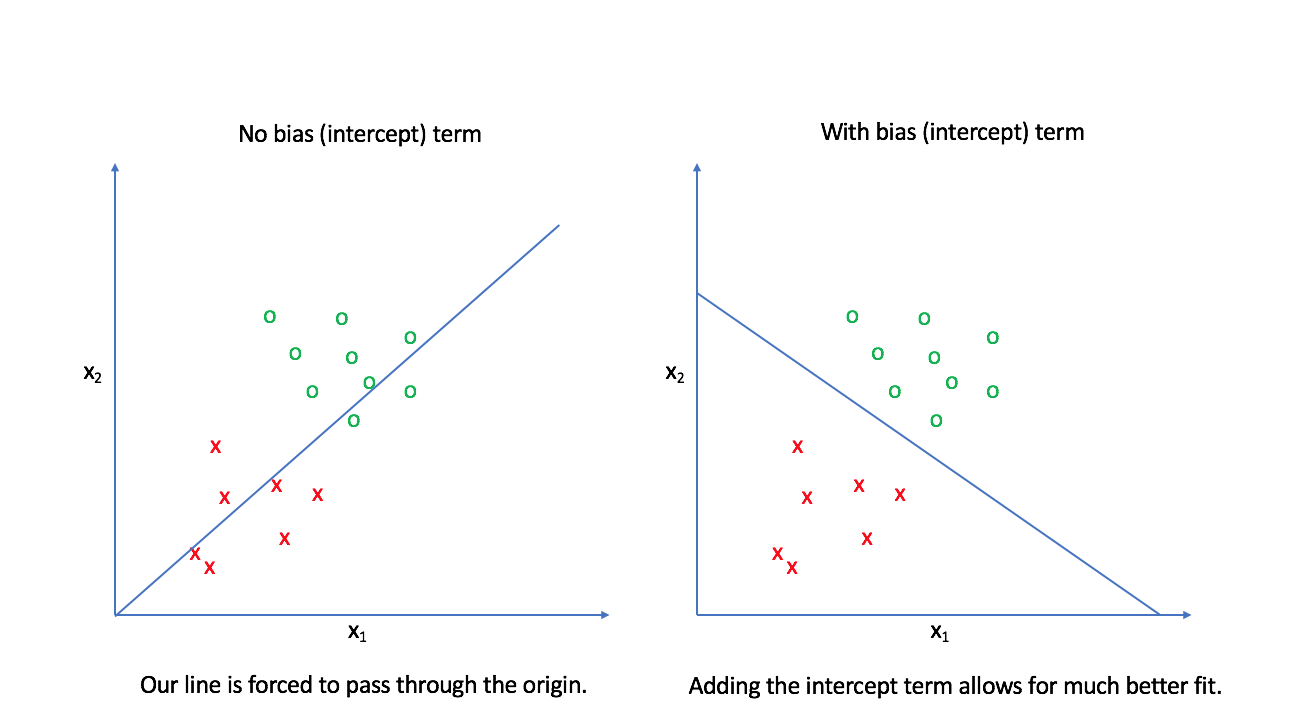

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-udph4fju
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-udph4fju
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=b2dc8cffc1742d58a73155f392ab490f064e10b4b5825b16238786673965eb3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2cuosaso/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=acb591112162b801e7fd425696fe9e806ee239f9d784631a046a548d9e04b6a7
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [2]:
x = np.arange(0,9)

In [3]:
x.shape

(9,)

In [4]:
x = x[:,None]

In [5]:
x.shape

(9, 1)

In [6]:
y = 3*x-5

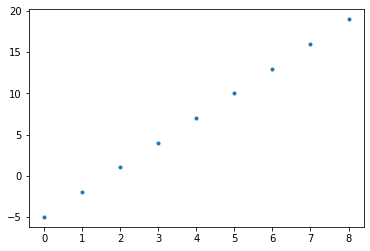

In [7]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [8]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [9]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [10]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [11]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 791.9484252929688 0.8905558586120605 0.818654477596283
1 328.7234802246094 1.332265853881836 0.8657986521720886
2 172.71444702148438 1.59036386013031 0.8802911639213562
3 119.75041961669922 1.7421144247055054 0.8759397268295288
4 101.3536376953125 1.8322640657424927 0.860740602016449
5 94.5569839477539 1.886726975440979 0.8393242359161377
6 91.65737915039062 1.92051100730896 0.8143720626831055
7 90.0711441040039 1.942307710647583 0.7874366044998169
8 88.93168640136719 1.9571506977081299 0.7594165802001953
9 87.94831848144531 1.967955231666565 0.7308322191238403
10 87.02345275878906 1.9764095544815063 0.7019844651222229
11 86.12431335449219 1.9834915399551392 0.6730472445487976
12 85.23980712890625 1.9897675514221191 0.644120991230011
13 84.36617279052734 1.99556565284729 0.6152635216712952
14 83.50212097167969 2.0010759830474854 0.58650803565979
15 82.64710235595703 2.006408452987671 0.5578734278678894
16 81.8009033203125 2.011626958847046 0.5293703079223633
17 80.96340942382812 2.01

In [12]:
loss.item()

0.0033073786180466413

In [13]:
m.item()

2.9937164783477783

In [14]:
b.item()

-4.964840412139893

# Pytorch Linear Model

In [15]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [16]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [17]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [18]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [19]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 175.1251678466797
2 1000 56.50029754638672
3 1000 22.801910400390625
4 1000 13.174013137817383
5 1000 10.368976593017578
6 1000 9.498522758483887
7 1000 9.177220344543457
8 1000 9.012405395507812
9 1000 8.892781257629395
10 1000 8.786791801452637
11 1000 8.6854887008667
12 1000 8.586322784423828
13 1000 8.488564491271973
14 1000 8.391996383666992
15 1000 8.296550750732422
16 1000 8.202195167541504
17 1000 8.108915328979492
18 1000 8.01669692993164
19 1000 7.925525188446045
20 1000 7.835393905639648
21 1000 7.746286392211914
22 1000 7.65818977355957
23 1000 7.571097373962402
24 1000 7.484996318817139
25 1000 7.399871826171875
26 1000 7.3157196044921875
27 1000 7.23252010345459
28 1000 7.150269508361816
29 1000 7.0689520835876465
30 1000 6.988561630249023
31 1000 6.909082412719727
32 1000 6.830508708953857
33 1000 6.752828598022461
34 1000 6.676033973693848
35 1000 6.600111484527588
36 1000 6.525050640106201
37 1000 6.4508442878723145
38 1000 6.377481937408447
39 1000 6.3049550056

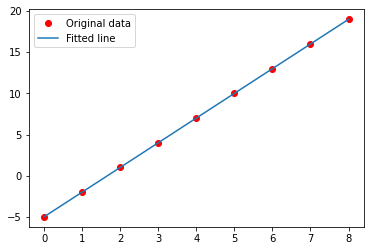

In [20]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [21]:
model

Linear(in_features=1, out_features=1, bias=True)

In [22]:
model.weight

Parameter containing:
tensor([[2.9966]], requires_grad=True)

In [23]:
model.bias

Parameter containing:
tensor([-4.9811], requires_grad=True)

In [24]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [25]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [26]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [27]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [28]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [29]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [30]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [31]:
X.shape

(60000, 1, 28, 28)

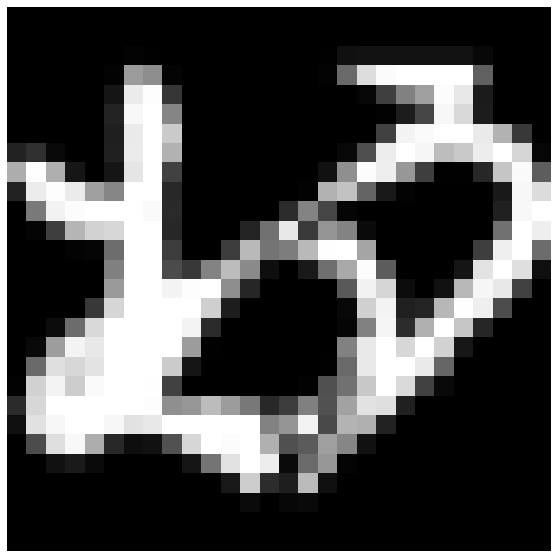

In [32]:
plot(X[2,0,:,:])

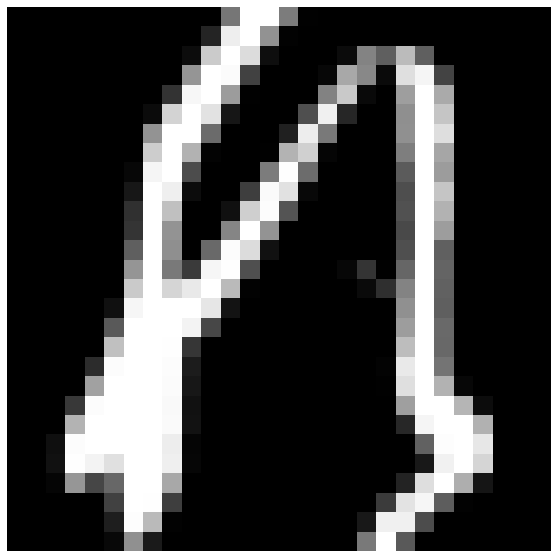

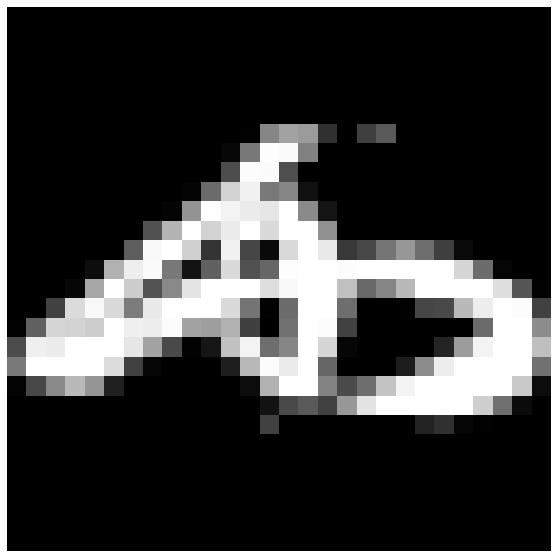

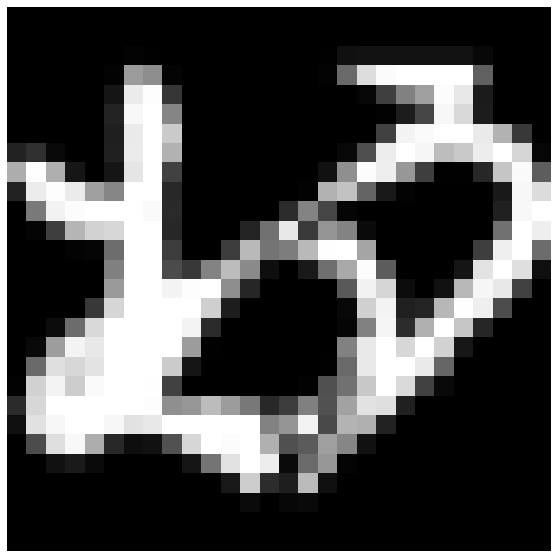

In [33]:
for i in range(3):
    plot(X[i,0,:,:])

In [34]:
Y

array([8, 7, 0, ..., 0, 4, 9])

In [35]:
X[0:25,0,:,:].shape

(25, 28, 28)

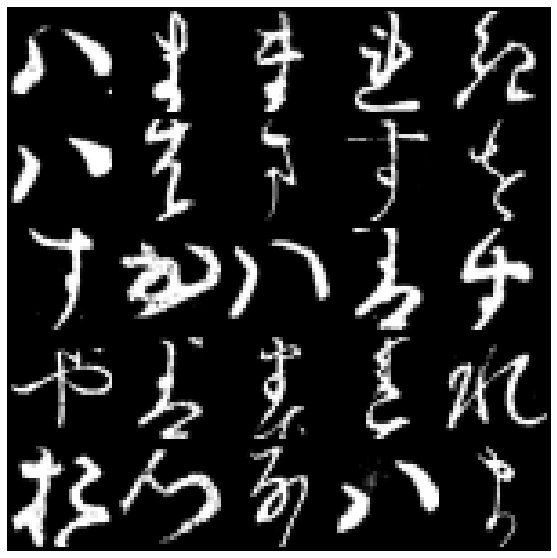

In [36]:
montage_plot(X[125:150,0,:,:])

In [37]:
X.shape[0]

60000

In [38]:
X_test.shape

(10000, 1, 28, 28)

In [39]:
X.shape[0]

60000

In [40]:
X_test.shape[0]

10000

In [41]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [42]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

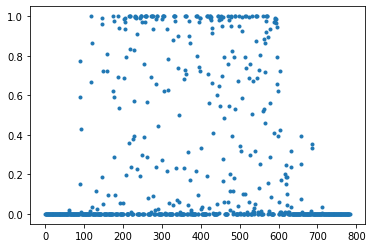

In [43]:
plt.plot(X[100],'.')

In [44]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [45]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [46]:
W = torch.load("W.data")

In [47]:
W.shape

torch.Size([784, 10])

In [48]:
X.shape

torch.Size([60000, 784])

In [49]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

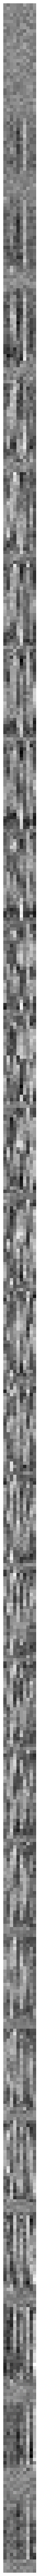

In [50]:
plot(W[0:784,:10])

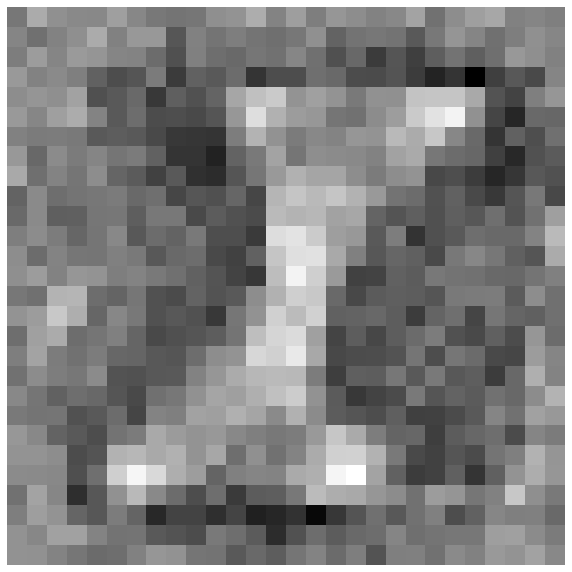

In [51]:
plot(W[:,1].reshape(28,28))

In [52]:
X.shape

torch.Size([60000, 784])

In [53]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [54]:
x,y = get_batch('train')

In [55]:
x.shape

torch.Size([1000, 784])

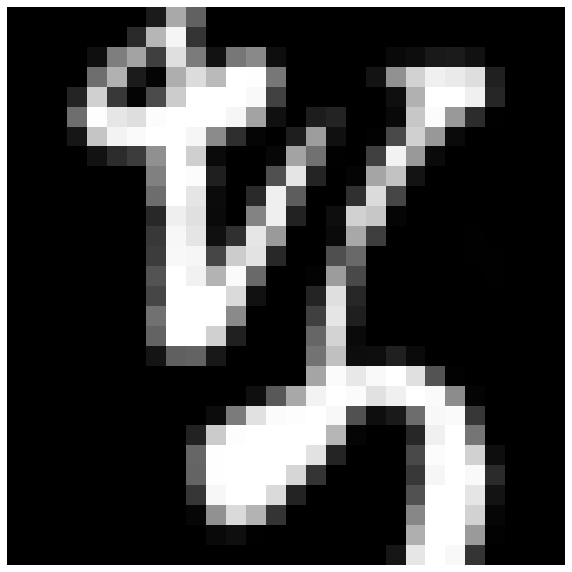

In [56]:
plot(x[0].reshape(28,28))

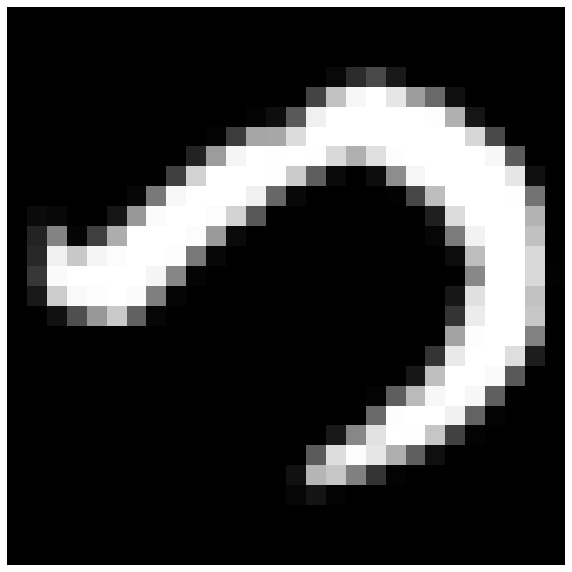

In [57]:
plot(x[1].reshape(28,28))

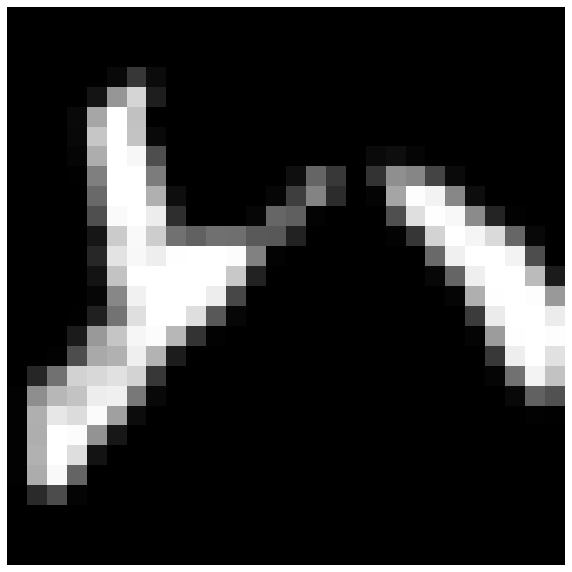

In [58]:
plot(x[2].reshape(28,28))

In [59]:
y

tensor([4., 3., 5., 0., 7., 1., 8., 4., 9., 3., 1., 0., 0., 7., 3., 6., 9., 0.,
        6., 4., 0., 1., 2., 3., 8., 4., 5., 6., 8., 2., 9., 4., 1., 5., 3., 6.,
        9., 6., 0., 3., 2., 1., 0., 7., 0., 2., 2., 8., 1., 3., 1., 4., 0., 2.,
        6., 8., 0., 0., 7., 5., 3., 8., 3., 2., 8., 6., 1., 9., 7., 3., 5., 1.,
        6., 8., 8., 8., 0., 6., 9., 7., 6., 0., 4., 2., 6., 5., 0., 0., 9., 8.,
        1., 5., 7., 7., 3., 5., 2., 3., 8., 2., 4., 2., 3., 1., 9., 2., 7., 7.,
        2., 4., 6., 1., 4., 7., 6., 2., 4., 3., 9., 4., 5., 1., 9., 5., 5., 2.,
        6., 9., 6., 1., 7., 0., 6., 0., 7., 4., 9., 4., 1., 8., 2., 7., 3., 3.,
        8., 5., 6., 0., 9., 4., 8., 0., 7., 6., 4., 4., 8., 4., 2., 5., 7., 7.,
        2., 4., 6., 2., 3., 6., 7., 6., 1., 3., 8., 5., 1., 5., 6., 1., 0., 3.,
        3., 0., 9., 9., 8., 8., 0., 5., 6., 7., 8., 6., 6., 2., 8., 1., 4., 9.,
        9., 5., 3., 7., 9., 2., 0., 6., 2., 5., 6., 1., 1., 1., 8., 5., 1., 1.,
        1., 1., 1., 7., 6., 3., 1., 3., 

In [60]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [61]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [62]:
(x@W).shape

torch.Size([1000, 10])

In [63]:
%%timeit
x@W

20.7 µs ± 284 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [64]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [65]:
x@W

tensor([[-13.4282, -28.8681,  -6.2760,  ..., -11.3837, -14.3962,  -9.8932],
        [  0.8298, -20.8037, -10.7382,  ..., -11.0642,  -0.3795, -22.1055],
        [ -2.0507, -22.1060,  -5.1647,  ..., -10.1973, -12.6494, -16.8437],
        ...,
        [ -8.6435, -19.4652, -13.8053,  ...,   3.6452,  -6.7042, -18.2366],
        [-22.7154, -16.4239,  -7.3116,  ...,   1.1169, -17.4513,   8.9932],
        [ -2.8469,  -1.6830,  -0.5328,  ...,  -0.0661,  -2.0245,  -0.7401]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [66]:
y2 = x@W 

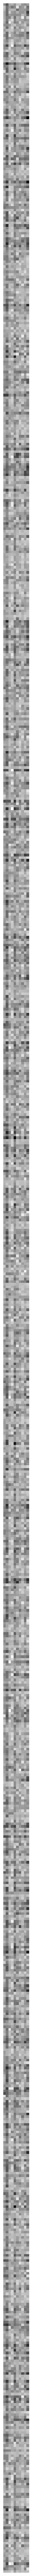

In [67]:
plot(y2)

In [68]:
y

tensor([4., 3., 5., 0., 7., 1., 8., 4., 9., 3., 1., 0., 0., 7., 3., 6., 9., 0.,
        6., 4., 0., 1., 2., 3., 8., 4., 5., 6., 8., 2., 9., 4., 1., 5., 3., 6.,
        9., 6., 0., 3., 2., 1., 0., 7., 0., 2., 2., 8., 1., 3., 1., 4., 0., 2.,
        6., 8., 0., 0., 7., 5., 3., 8., 3., 2., 8., 6., 1., 9., 7., 3., 5., 1.,
        6., 8., 8., 8., 0., 6., 9., 7., 6., 0., 4., 2., 6., 5., 0., 0., 9., 8.,
        1., 5., 7., 7., 3., 5., 2., 3., 8., 2., 4., 2., 3., 1., 9., 2., 7., 7.,
        2., 4., 6., 1., 4., 7., 6., 2., 4., 3., 9., 4., 5., 1., 9., 5., 5., 2.,
        6., 9., 6., 1., 7., 0., 6., 0., 7., 4., 9., 4., 1., 8., 2., 7., 3., 3.,
        8., 5., 6., 0., 9., 4., 8., 0., 7., 6., 4., 4., 8., 4., 2., 5., 7., 7.,
        2., 4., 6., 2., 3., 6., 7., 6., 1., 3., 8., 5., 1., 5., 6., 1., 0., 3.,
        3., 0., 9., 9., 8., 8., 0., 5., 6., 7., 8., 6., 6., 2., 8., 1., 4., 9.,
        9., 5., 3., 7., 9., 2., 0., 6., 2., 5., 6., 1., 1., 1., 8., 5., 1., 1.,
        1., 1., 1., 7., 6., 3., 1., 3., 

In [69]:
one_hot(y)

<ipython-input-24-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

<ipython-input-24-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


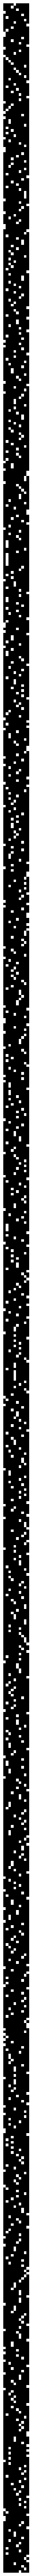

In [70]:
plot(one_hot(y))

<ipython-input-24-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


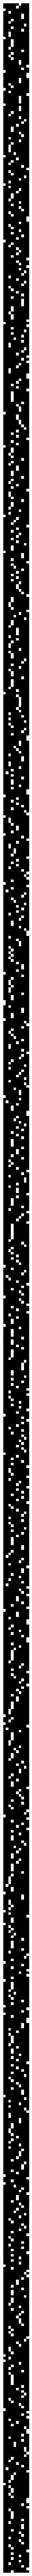

In [71]:
plot(one_hot(torch.argmax(y2,1)))

In [72]:
y

tensor([4., 3., 5., 0., 7., 1., 8., 4., 9., 3., 1., 0., 0., 7., 3., 6., 9., 0.,
        6., 4., 0., 1., 2., 3., 8., 4., 5., 6., 8., 2., 9., 4., 1., 5., 3., 6.,
        9., 6., 0., 3., 2., 1., 0., 7., 0., 2., 2., 8., 1., 3., 1., 4., 0., 2.,
        6., 8., 0., 0., 7., 5., 3., 8., 3., 2., 8., 6., 1., 9., 7., 3., 5., 1.,
        6., 8., 8., 8., 0., 6., 9., 7., 6., 0., 4., 2., 6., 5., 0., 0., 9., 8.,
        1., 5., 7., 7., 3., 5., 2., 3., 8., 2., 4., 2., 3., 1., 9., 2., 7., 7.,
        2., 4., 6., 1., 4., 7., 6., 2., 4., 3., 9., 4., 5., 1., 9., 5., 5., 2.,
        6., 9., 6., 1., 7., 0., 6., 0., 7., 4., 9., 4., 1., 8., 2., 7., 3., 3.,
        8., 5., 6., 0., 9., 4., 8., 0., 7., 6., 4., 4., 8., 4., 2., 5., 7., 7.,
        2., 4., 6., 2., 3., 6., 7., 6., 1., 3., 8., 5., 1., 5., 6., 1., 0., 3.,
        3., 0., 9., 9., 8., 8., 0., 5., 6., 7., 8., 6., 6., 2., 8., 1., 4., 9.,
        9., 5., 3., 7., 9., 2., 0., 6., 2., 5., 6., 1., 1., 1., 8., 5., 1., 1.,
        1., 1., 1., 7., 6., 3., 1., 3., 

In [73]:
torch.argmax(y2,1)

tensor([6, 5, 0, 2, 7, 7, 3, 2, 8, 3, 7, 2, 2, 0, 3, 3, 3, 2, 7, 3, 2, 3, 6, 6,
        9, 7, 0, 9, 9, 6, 6, 2, 3, 0, 2, 9, 6, 6, 6, 0, 6, 6, 3, 2, 6, 8, 7, 5,
        3, 3, 6, 7, 2, 6, 3, 2, 2, 2, 4, 0, 5, 3, 2, 7, 9, 2, 3, 8, 6, 2, 0, 2,
        6, 5, 3, 3, 2, 6, 3, 6, 7, 2, 3, 9, 9, 6, 2, 3, 6, 3, 7, 5, 0, 3, 2, 5,
        6, 5, 3, 9, 5, 6, 9, 6, 8, 7, 2, 5, 8, 7, 2, 3, 5, 7, 3, 7, 7, 7, 3, 3,
        2, 3, 3, 9, 0, 9, 3, 8, 3, 7, 4, 7, 2, 2, 8, 7, 5, 9, 7, 9, 6, 5, 2, 2,
        9, 9, 6, 5, 3, 5, 9, 3, 3, 3, 3, 7, 5, 6, 6, 0, 5, 5, 6, 6, 7, 8, 5, 3,
        5, 9, 3, 5, 0, 3, 3, 2, 3, 7, 3, 2, 5, 5, 3, 3, 7, 3, 2, 5, 3, 9, 2, 2,
        3, 7, 3, 3, 2, 6, 2, 0, 5, 4, 3, 9, 5, 3, 6, 5, 3, 5, 8, 3, 3, 0, 7, 7,
        3, 9, 3, 4, 7, 5, 3, 5, 3, 6, 5, 5, 6, 7, 9, 3, 3, 2, 2, 3, 9, 6, 4, 8,
        3, 3, 2, 5, 5, 5, 2, 5, 3, 2, 2, 6, 2, 3, 3, 8, 7, 3, 6, 2, 3, 3, 7, 3,
        3, 3, 2, 5, 0, 5, 6, 6, 6, 6, 5, 6, 2, 7, 2, 8, 2, 3, 8, 7, 3, 9, 9, 6,
        6, 4, 5, 6, 2, 7, 7, 2, 2, 6, 3,

In [74]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0720, device='cuda:0')

In [75]:
X.shape

torch.Size([60000, 784])

In [76]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [77]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [78]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [79]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [80]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [81]:
W.shape

torch.Size([784, 10])

In [82]:
W[:,0].shape

torch.Size([784])

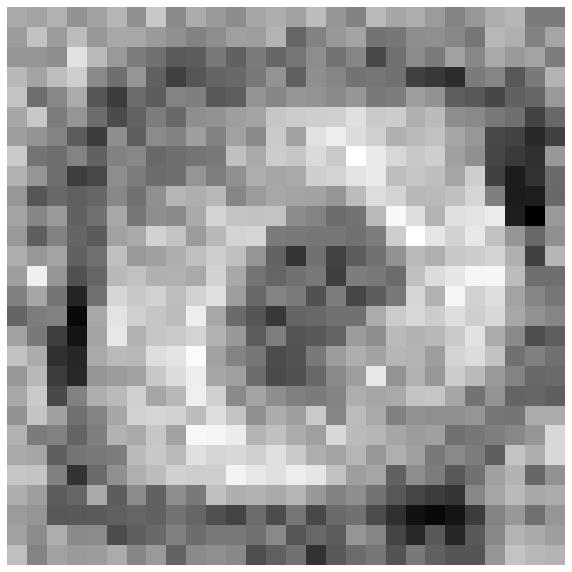

In [83]:
plot(W[:,0].reshape(28,28))

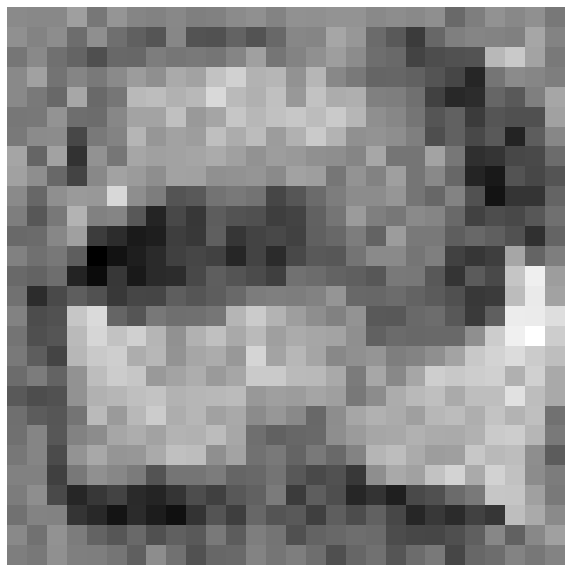

In [84]:
plot(W[:,2].reshape(28,28))

In [85]:
W.shape

torch.Size([784, 10])

In [86]:
(W.T).shape

torch.Size([10, 784])

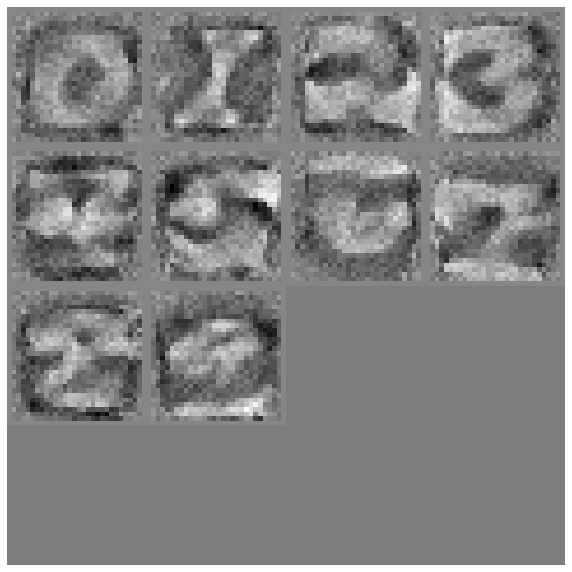

In [87]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [88]:
###################################################

In [89]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [90]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [91]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [92]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [93]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [94]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [95]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [96]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [97]:
X.shape

torch.Size([60000, 784])

In [98]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [99]:
def model(x,w):

    return x@w[0]

In [100]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing